# BACCHANAL BUFFET RESTAURANT NLP HOMEWROK

Burada Bacchanal Buffet Restaurant hakkındaki yelp yorumlarını inceleyen NLP ödevini yapacağım.

In [2]:
import pandas as pd
import seaborn as sns
import nltk
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ahmetfarukizgordu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
df=pd.read_csv("restaurant.csv")

In [6]:
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


In [7]:
df.tail()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
10412,3220114,46xWDTFPZI9u6waHm78EKw,CT57mpNepL9q9sTYFqRbLQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,"Best buffet ever! Irma was great, served us be...",2019-11-17 20:39:36
10413,3220152,gbBau-2wy3_kNr2y6dEa1Q,c-j3TV1F8rI6bQUD6nqGPQ,RESDUcs7fIiihp38-d6_6g,4,3,0,3,Hollllllyyyy moleyyyy! \n\nThis buffet was one...,2019-11-12 02:23:07
10414,3220255,2wFmrsm8j1cyyG-DoMqKUw,kbylx63ynkXL8YBJzVfNnQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,The selection is amazing and all the food is e...,2019-12-12 03:27:22
10415,3220306,75nzyA96_BgVrpflweAA3w,6rEG-G4syq5IvWti4tyPXA,RESDUcs7fIiihp38-d6_6g,4,1,1,2,One of the best buffets I've had in Vegas. My ...,2019-11-01 21:00:51
10416,3220316,mMa_YQNBJfuh_Nw_x81jlw,GsALS1y9wJoBRJTEzJiISg,RESDUcs7fIiihp38-d6_6g,4,1,1,1,I got a chance to go to the Bacchanal Buffett ...,2019-11-30 22:36:56


In [8]:
df.shape

(10417, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10417 entries, 0 to 10416
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10417 non-null  int64 
 1   review_id    10417 non-null  object
 2   user_id      10417 non-null  object
 3   business_id  10417 non-null  object
 4   stars        10417 non-null  int64 
 5   useful       10417 non-null  int64 
 6   funny        10417 non-null  int64 
 7   cool         10417 non-null  int64 
 8   text         10417 non-null  object
 9   date         10417 non-null  object
dtypes: int64(5), object(5)
memory usage: 814.0+ KB


In [10]:
df.describe()

,Unnamed: 0,stars,useful,funny,cool
count,1.041700e+04,10417.000000,10417.000000,10417.000000,10417.000000
mean,2.775377e+06,3.777671,1.419603,0.640875,0.759720
std,2.428654e+05,1.331451,4.875888,3.347964,4.125847
min,2.370338e+06,1.000000,0.000000,0.000000,0.000000
25%,2.566392e+06,3.000000,0.000000,0.000000,0.000000
50%,2.762536e+06,4.000000,0.000000,0.000000,0.000000
75%,2.975480e+06,5.000000,1.000000,0.000000,0.000000
max,3.220316e+06,5.000000,176.000000,159.000000,172.000000


In [11]:
df.isnull().sum()

Unnamed: 0     0
review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [12]:
df.sample(10)

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
8704,3063765,Mg3M2AKWM7wMzQUns1iE2w,LJ-0Qe7OQpIyxtF9YlZ7IA,RESDUcs7fIiihp38-d6_6g,3,0,0,0,Tried out Bacchanal to experience the good rev...,2019-10-16 22:48:29
4045,2675589,LNKw-924-XdnKJEGZ1hoZQ,epEeyQ_5S1WEAJL1CKB0BQ,RESDUcs7fIiihp38-d6_6g,4,0,0,0,Wow.. was waited the whole day in total of Thr...,2015-02-09 04:55:18
2127,2529738,4sS9o-3twJMvyn8Jk-uGKw,yvgjzD8x-VDIiEeEKjRDkw,RESDUcs7fIiihp38-d6_6g,4,0,0,0,We had an early lunch here. It was great! Ever...,2015-05-17 03:49:09
1542,2486658,O_vPyZroSYDZDbWduc3jeQ,UhncxajHGGEgPN6HRpibvA,RESDUcs7fIiihp38-d6_6g,5,0,0,0,Our family enjoyed an amazing meal last nite. ...,2017-10-05 16:33:42
355,2396631,rhslNp9lHGWmOz1xaAeMcA,UyKVmpHUcsk_tjcspIWUow,RESDUcs7fIiihp38-d6_6g,3,0,1,0,We planned a whole day around going here becau...,2015-04-29 12:51:39
6068,2828200,tjBPy-e2Gt4UpSi_SdTXew,FfZ74qjDVkWLo4wYHDxdhA,RESDUcs7fIiihp38-d6_6g,1,0,0,1,"This Buffet is a 1.5 , I refuse to give it a 2...",2014-07-07 09:52:28
2532,2559498,NtDYbZGjEt3yucTNUxfCDA,cGVkX9DfKhPxwVJVTLrmHQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,Best buffet ever....I'm a local and I like to ...,2018-09-07 02:58:42
7400,2941496,VNBt_4SANvCUa2yP792Mqw,PcSb1YI8jVX5w2BIw2Kqtw,RESDUcs7fIiihp38-d6_6g,5,1,0,1,We avoided this place our first few days becau...,2018-03-14 03:10:30
3632,2642436,jF_wMye6boQRwnFiFwEbWw,-u_PHSe7PYi4RnarqtVLGw,RESDUcs7fIiihp38-d6_6g,5,0,2,1,I love this place.\nNot even gonna sugarcoat i...,2015-08-13 23:59:40
10343,3214132,Eu4Q0PUwGba3etBYEvS_HA,L4nh81uf2Dnt_E-Py1GaQw,RESDUcs7fIiihp38-d6_6g,4,0,0,0,The selection is amazing! They have almost any...,2019-12-13 06:02:52


## EDA - Exploratory Data Analysis 

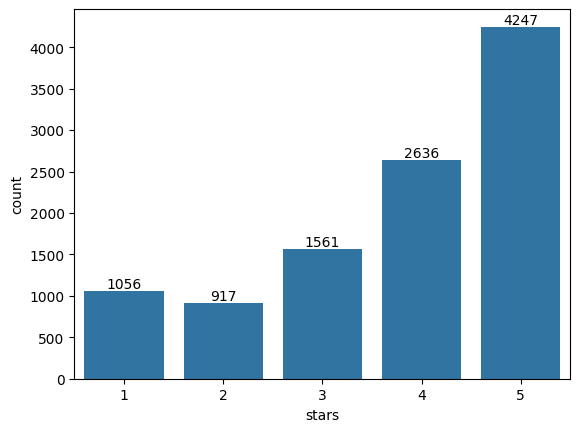

In [13]:
ax=sns.countplot(x=df['stars'])
ax.bar_label(ax.containers[0]); 

In [14]:
df['date'].max()

'2019-12-13 07:33:11'

In [15]:
df['date'].min()

'2012-09-10 20:03:19'

In [16]:
df['date'] = pd.to_datetime(df['date'])

In [17]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek
df['hour'] = df['date'].dt.hour

In [18]:
df.sample(10)

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year,month,day_of_week,hour
2666,2571203,-bZbzEn854tc5SF0mHlu5A,C-ijLdB6Ekt7XE8f5APsyg,RESDUcs7fIiihp38-d6_6g,3,0,0,0,"Looks better than it taste. Kinda pricey, so ...",2016-10-03 19:03:53,2016,10,0,19
518,2409818,NldBEwBG0wlqMU1lURejCg,S0o5Xh_84zCecMjpQ8R2xg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I have done all the buffet in Vegas I come her...,2015-08-31 15:23:25,2015,8,0,15
9150,3105046,_aq76ad4jN8LpLqmZZt1Jg,rvOfd7HHkS3vs9KSsmLTPw,RESDUcs7fIiihp38-d6_6g,5,0,0,0,Amazing food and Service!!!frog legs is great ...,2019-10-14 20:28:14,2019,10,0,20
7203,2925593,lF7LYivXK5hzdYJBLJn-Jw,vB3b7iourCSkjIkjy8BCrQ,RESDUcs7fIiihp38-d6_6g,3,0,0,0,We went to Bacchanal on Thursday at 2pm hoping...,2013-12-27 16:27:51,2013,12,4,16
9864,3171512,JeOmLw8KXCrSVMEASFaurA,GosVWmEi8tClv9zFxjy0eg,RESDUcs7fIiihp38-d6_6g,4,0,0,0,4 stars seems right.\n\n1) The food is awesome...,2016-08-12 14:31:21,2016,8,4,14
892,2439394,fGwnXMXBAsduEvLE0muBQA,dsX3MiQiTy3OVI8MKn0I4w,RESDUcs7fIiihp38-d6_6g,5,15,5,7,The best buffet I've ever had in Vegas and bel...,2016-06-13 11:35:07,2016,6,0,11
2359,2547530,OFQeuDPUtLrM41QYPXHgsg,0aGMVKiNqmY1kCc5983UkQ,RESDUcs7fIiihp38-d6_6g,3,0,0,0,So I read other reviews and I thought the food...,2016-01-22 01:50:05,2016,1,4,1
10309,3211821,jHN0QJfzRZFSI9_WUuVHSA,pjwzwcfBFWHQRYVwBKHzTw,RESDUcs7fIiihp38-d6_6g,4,23,15,21,"I honestly was so excited to eat here, mainly ...",2018-06-27 21:38:01,2018,6,2,21
4656,2722001,Rn_DI1u6MrAdxzuMklhIcg,3EoZABMg13xy3crWHT-kag,RESDUcs7fIiihp38-d6_6g,5,0,0,0,My husband and I came here two weekends ago on...,2017-03-20 20:25:27,2017,3,0,20
3560,2638103,kv3zckJZeKjKUBEqm5eVEg,DRD1wGc1BaVKnnFA3T-MWA,RESDUcs7fIiihp38-d6_6g,3,0,0,0,The food here is pretty decent...there's a lot...,2016-04-05 05:16:22,2016,4,1,5


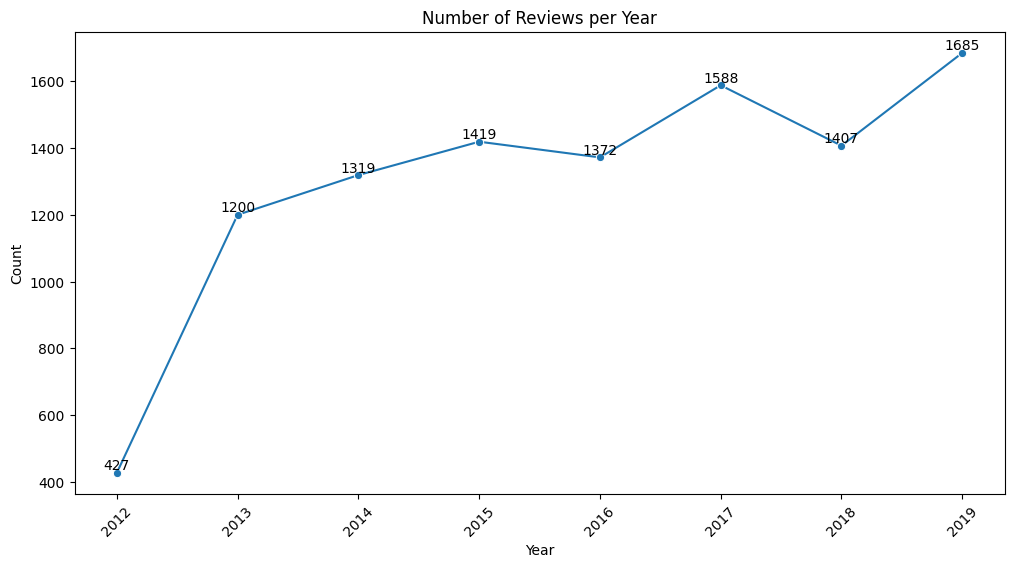

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Yıllara göre veri sayısını hesaplama
yearly_counts = df['year'].value_counts().sort_index()

# Çizgi grafiği oluşturma
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o')

# Her noktanın üzerine sayıları ekleme
for x, y in zip(yearly_counts.index, yearly_counts.values):
    ax.text(x, y, str(y), ha='center', va='bottom')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Reviews per Year')
plt.xticks(rotation=45)  # X eksenindeki yılların daha iyi görünmesi için
plt.show()

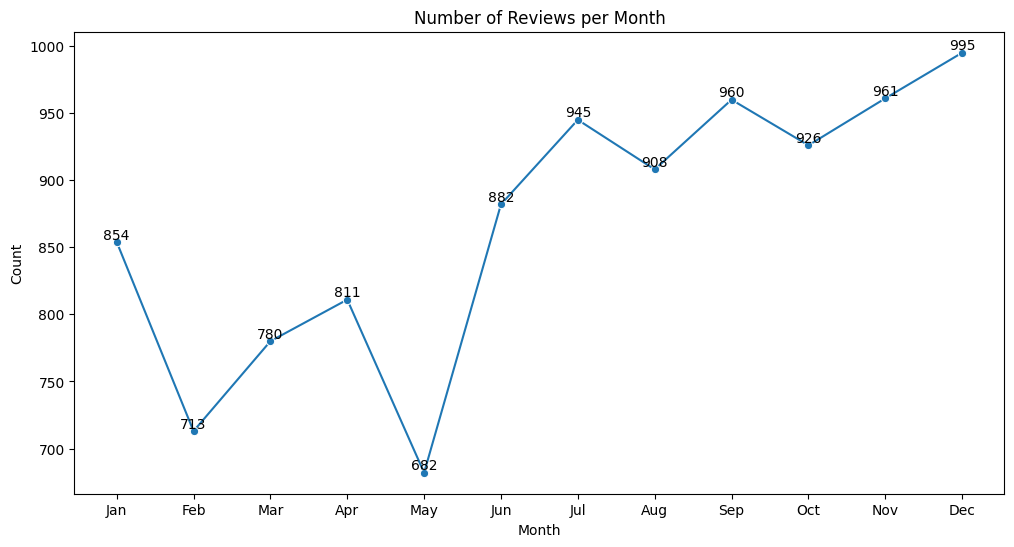

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Aylara göre veri sayısını hesaplama
monthly_counts = df['month'].value_counts().sort_index()

# Çizgi grafiği oluşturma
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x=monthly_counts.index, y=monthly_counts.values, marker='o')

# Her noktanın üzerine sayıları ekleme
for x, y in zip(monthly_counts.index, monthly_counts.values):
    ax.text(x, y, str(y), ha='center', va='bottom')

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Number of Reviews per Month')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

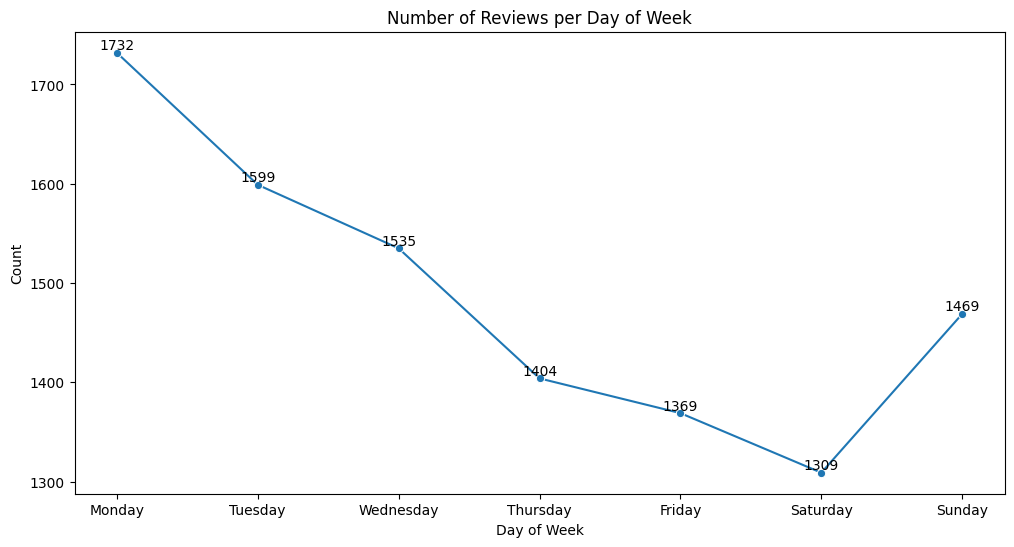

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Haftanın günlerine göre veri sayısını hesaplama
day_of_week_counts = df['day_of_week'].value_counts().sort_index()

# Gün adlarını belirleme
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Çizgi grafiği oluşturma
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x=day_of_week_counts.index, y=day_of_week_counts.values, marker='o')

# Her noktanın üzerine sayıları ekleme
for x, y in zip(day_of_week_counts.index, day_of_week_counts.values):
    ax.text(x, y, str(y), ha='center', va='bottom')

plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.title('Number of Reviews per Day of Week')
plt.xticks(ticks=range(7), labels=days)
plt.show()

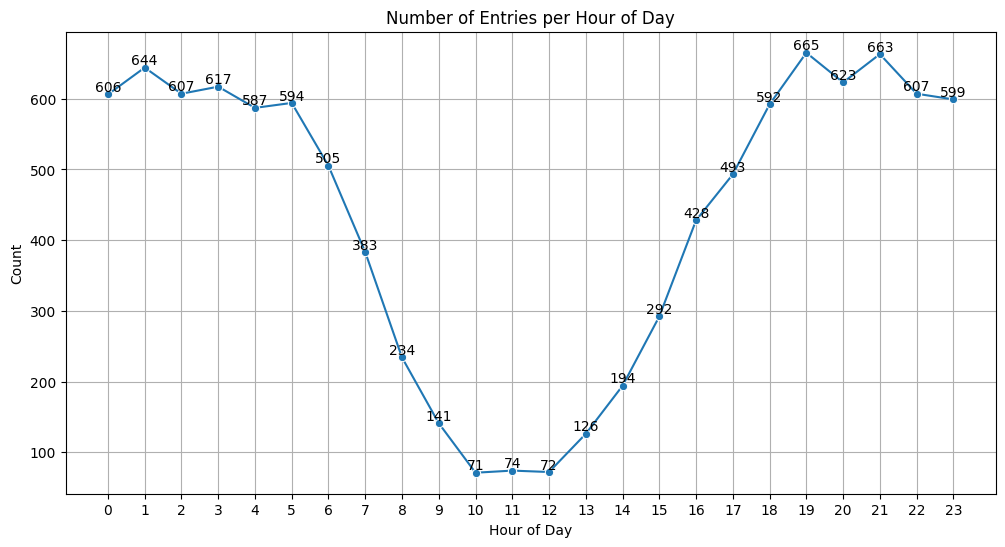

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Saatlerin sayısını hesaplama
hour_counts = df['hour'].value_counts().sort_index()

# Çizgi grafiği oluşturma
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x=hour_counts.index, y=hour_counts.values, marker='o')

# Her noktanın üzerine sayıları ekleme
for x, y in zip(hour_counts.index, hour_counts.values):
    ax.text(x, y, str(y), ha='center', va='bottom')

plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.title('Number of Entries per Hour of Day')
plt.xticks(ticks=range(24))  # Saatleri 0'dan 23'e kadar göster
plt.grid(True)  # Grafik üzerinde ızgara eklemek için
plt.show()

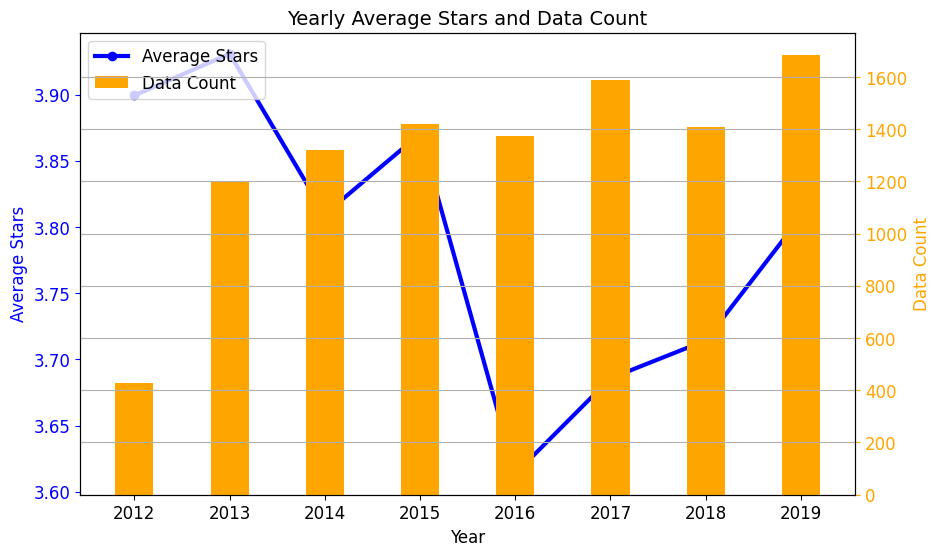

In [23]:

# Convert the 'year' column to numeric
df['year'] = df['year'].astype(int)

# Calculate the average 'stars' value for each year
avg_stars = df.groupby('year')['stars'].mean()

# Calculate the count of data for each year
data_count = df.groupby('year')['stars'].count()

# Create the figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the average stars line graph
ax1.plot(avg_stars.index, avg_stars, color='blue', marker='o', linewidth=3, label='Average Stars')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Average Stars', color='blue', fontsize=12)
ax1.tick_params('y', colors='blue', labelsize=12)
ax1.tick_params(axis='x', labelsize=12)

# Plot the data count bar graph
ax2 = ax1.twinx()
ax2.bar(data_count.index, data_count, color='orange', width=0.4, label='Data Count')
ax2.set_ylabel('Data Count', color='orange', fontsize=12)
ax2.tick_params('y', colors='orange', labelsize=12)

# Set the legend and grid
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=12)
plt.grid(True)

# Set the title
plt.title('Yearly Average Stars and Data Count', fontsize=14)
plt.show()

## TEXT PROCESSING

In [24]:
df['text']=df['text'].str.lower() #küçük harfe çevir
df['text']=df['text'].str.replace('[^\w\s]', ' ',regex=True) #noktalama işaretlerini kaldırır
df['text']=df['text'].str.replace('\n', ' ',regex=True) #satır sonlarını kaldırır
df['text']=df['text'].str.replace('\d+', ' ',regex=True) #rakamları kaldırır
df['text']=df['text'].str.replace('\r', ' ',regex=True) #satır başlarını baldırır

In [25]:
df.sample(10)

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year,month,day_of_week,hour
3281,2617410,Qh8KC7OUiRcyTkS7tKQVZg,LD37Bft-v7tPqfh0SbwBdw,RESDUcs7fIiihp38-d6_6g,5,0,0,0,this is by far my favorite buffet in vegas i ...,2017-04-03 21:27:13,2017,4,0,21
7667,2963578,jQVqKEGtnlQI-nTqGv3C4g,q7M4Bo_yHRR5DN5gYkRyxg,RESDUcs7fIiihp38-d6_6g,1,0,0,0,in my opinion this place doesn t live up to i...,2018-03-22 06:42:32,2018,3,3,6
1035,2450042,eG4f1usMXfmHELAR06SK2w,slrH6zwPlP8GHbm4lbGLkw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,in the words of my boyfriend this is the bes...,2013-11-19 01:04:19,2013,11,1,1
2686,2573206,S6M4oHzWtsIj4E6p74O7tA,tlTuLJOkeWga6vV3H6wnIg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,this place is expensive but it sure was worth...,2016-10-19 04:10:19,2016,10,2,4
2456,2554958,N-XogndZOd7UywI3CjuCbw,bI1dEvJkZ30GrmNPIA0udw,RESDUcs7fIiihp38-d6_6g,2,0,0,0,i m the usual here we came to vegas twice a y...,2017-02-13 08:41:40,2017,2,0,8
8785,3071858,OL3KmAFrkFXpjY-BJOcaVA,TH1hg9h0B4Gqlf7cYyeYBA,RESDUcs7fIiihp38-d6_6g,5,3,1,1,wow amazing this buffet has been ranked ...,2019-02-18 00:58:54,2019,2,0,0
9752,3160706,Y5iZS9084p9XMkMaAptmVw,jhSVXuEeEX7eDSWzoHID1w,RESDUcs7fIiihp38-d6_6g,5,0,0,0,this is the best place i ve ever been too muc...,2019-05-21 21:18:32,2019,5,1,21
2492,2557185,B4S0iz3NXSWSCRK6oHQQ5A,PJhCmZog4xnUz10lfJu3oQ,RESDUcs7fIiihp38-d6_6g,5,2,4,2,i would describe myself as someone who is very...,2014-08-30 05:18:37,2014,8,5,5
6534,2867475,ke5Tjre95X-k-D769erndA,-fPnMS8IvaPwCTZy7dlP3w,RESDUcs7fIiihp38-d6_6g,5,2,1,1,bacchanal means a feast worthy of the gods ...,2015-03-02 09:09:04,2015,3,0,9
10099,3192242,dWhzNHPGTo9N0ne820uaSA,upivrs1L-wNXcuXxmRHuhw,RESDUcs7fIiihp38-d6_6g,4,0,0,0,got vip and still had to wait on line lots of...,2019-04-12 18:59:59,2019,4,4,18


In [26]:
point=df[(df.stars<3)|(df.stars>3)]

In [27]:
point.sample(10)

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year,month,day_of_week,hour
3847,2658576,lChnwbqAF52qRTFCAEl3ow,iKL6XORL5kq18uKrkRAing,RESDUcs7fIiihp38-d6_6g,5,0,0,0,ranked buffett in america by usa today a l...,2013-08-23 20:10:19,2013,8,4,20
4499,2710953,x-Fytw178CjBf9gFGDMmHg,k8SCv3_St9Q2HEovW3GZ4A,RESDUcs7fIiihp38-d6_6g,5,0,0,0,i was referred this buffet by a dear friend ...,2018-01-04 23:40:48,2018,1,3,23
8137,3009146,fHNf-j4JsXQicrXb-3-EeQ,Zuwo35sfV2fqTxFVenHHkg,RESDUcs7fIiihp38-d6_6g,1,1,0,0,i purchased the buffet of buffet package and w...,2019-08-29 16:50:07,2019,8,3,16
4209,2687282,-JgkP7tsW4JiVOdq1dQBUw,_91FxFZYTaUGVIEnQhB5cw,RESDUcs7fIiihp38-d6_6g,5,0,0,0,the wait can be very long but if it s more tha...,2015-01-24 21:18:14,2015,1,5,21
1749,2503555,J6sSSX7YKhQuonsPqKPTBQ,kHGRDaZt4nHgNSJcjOTDeQ,RESDUcs7fIiihp38-d6_6g,2,1,1,1,after reading the hype once caesar s palace de...,2013-05-12 03:31:19,2013,5,6,3
5268,2766457,GEIaX1uguLPH7HkWeAZsdQ,6CvJFjJQRZG64-2yPGb-_w,RESDUcs7fIiihp38-d6_6g,5,1,1,0,wow this place is unreal its like you died and...,2012-10-01 05:02:28,2012,10,0,5
8334,3028191,iHETmxeYnNPbwky3UDd-NQ,AbMjnKOwg736fcIu8apuyQ,RESDUcs7fIiihp38-d6_6g,4,72,53,54,how much would you pay for a popular busy bu...,2014-01-07 21:37:04,2014,1,1,21
5136,2757986,2PctS7udkZt5FIb0oY0Biw,fNO4FReV0b0dypxqdPGyzg,RESDUcs7fIiihp38-d6_6g,1,0,0,0,this place is seriously in need of better mana...,2013-07-08 13:33:10,2013,7,0,13
7471,2947597,m6jlsCzMux-shm44VYah8A,yoXT44JCm3hzNGSOsD-UyQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,the best buffet ever only bucks a person fo...,2016-01-13 21:42:52,2016,1,2,21
3719,2649262,uSDXdlP1Fi3S2LJtvcwaWQ,atiSkDM-IIdvRFJpiksVfw,RESDUcs7fIiihp38-d6_6g,5,0,0,0,pricey but worth it there are a ton of seafoo...,2015-08-02 07:34:28,2015,8,6,7


In [28]:
def sentiment_label(stars):
    if stars in [1, 2]:
        return 'negative'
    elif stars == 3:
        return 'neutral'
    elif stars in [4, 5]:
        return 'positive'

df['sentiment'] = df['stars'].apply(sentiment_label)

In [29]:
df.sample(10)

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year,month,day_of_week,hour,sentiment
6503,2864654,fmuMOQkmirYFuYI9JZ9JRg,I6iTwMZ8plNS8FYdlT0SHA,RESDUcs7fIiihp38-d6_6g,2,0,0,0,i am not really impressed with their buffet o...,2016-03-29 18:14:09,2016,3,1,18,negative
8723,3065013,wNx2sy8vS1h-8XW0fqd6Rg,DumRKLCalM0ciShBOusUUQ,RESDUcs7fIiihp38-d6_6g,4,0,0,0,this isn t a bad buffet and i would go again ...,2019-11-08 06:16:27,2019,11,4,6,positive
8243,3018460,GopAmwjTqlOzGuKuQWzbvw,5eYM5rscKlAarV_v8DUeWQ,RESDUcs7fIiihp38-d6_6g,2,4,0,1,this our third time here and while the bacchan...,2019-03-17 17:45:44,2019,3,6,17,negative
6055,2827088,kjttNW7fr4UqD18-XUd0Mg,snVJThfbkjZM5LXnUM0FzA,RESDUcs7fIiihp38-d6_6g,4,2,0,0,long wait in line otherwise excellent buffet ...,2017-12-25 18:27:23,2017,12,0,18,positive
10279,3209711,zgmdBvMBtzf-mCn3Aw0Lzw,5ctu-O-T2OeozZTCzbv47A,RESDUcs7fIiihp38-d6_6g,4,2,0,0,came for brunch thanksgiving weekend got in a...,2017-11-29 20:02:30,2017,11,2,20,positive
2109,2528802,-BwZIYPNsvQGRXfy3WyAhQ,r2R9t9_0Je8wP-wh4-xM3w,RESDUcs7fIiihp38-d6_6g,4,7,5,6,i rate this as one of my top buffets here in...,2013-01-08 22:26:53,2013,1,1,22,positive
2773,2579018,Ll_jlUArdDH-aNS1OEQQeQ,QRfBGDwTsu8Ci_70j_0A0w,RESDUcs7fIiihp38-d6_6g,4,0,0,0,definitely the very best buffet experience i h...,2013-10-11 23:56:02,2013,10,4,23,positive
1623,2493919,Zc39MsTM9OqbzAjFrPPHhA,GiPFuaACs7CuVf5B8NspfA,RESDUcs7fIiihp38-d6_6g,3,0,0,0,this place is very disappointing wait time fo...,2017-06-30 01:24:08,2017,6,4,1,neutral
4004,2672093,oZoXnkEfCGuAHilehX806A,38Y_9zJkmpI9ZyohMh4Kvw,RESDUcs7fIiihp38-d6_6g,1,3,0,0,we came here on thurs jan at pm and was to...,2014-01-09 19:34:01,2014,1,3,19,negative
8357,3030221,fvOLiYkEIl77mbcfybDAUg,SXbr-WVVPx5p0RUfyES5hA,RESDUcs7fIiihp38-d6_6g,1,11,3,1,for this was a complete rip off what happe...,2019-03-11 05:25:35,2019,3,0,5,negative


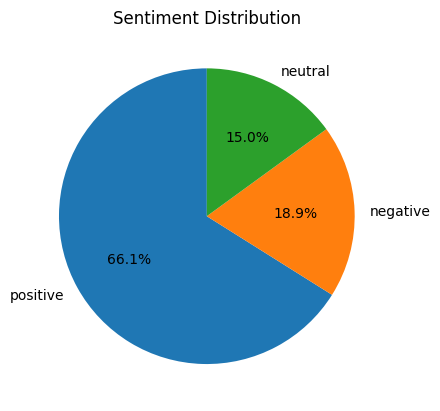

In [34]:

sentiment_counts = df['sentiment'].value_counts()

plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution')
plt.show()




In [30]:
from textblob import TextBlob

In [31]:
TextBlob(df['text'][0]).sentiment

Sentiment(polarity=0.36745179063360883, subjectivity=0.6057024793388429)

In [35]:
# calculate sentiment scores using TextBlob
sentiment_scores = df['text'].apply(lambda text: TextBlob(text).sentiment.polarity)